In [10]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [11]:
import src.dbscan as dbscan

### Initalize Data

In [43]:
data = datasets.make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.05, random_state=40)

### Setup function to graph data with eps radius

In [44]:
def graphWithRadius(c, title = ""):
    radius = 0.5
    fig, ax = plt.subplots()

    scatter = ax.scatter(data[0][:,0], data[0][:,1], c, cmap='coolwarm')
    colors = scatter.to_rgba(c)

    for point, color in zip(data[0], colors):
        circle = Circle((point[0], point[1]), radius, fill = True, color=color, alpha=0.3)
        ax.add_patch(circle)
    
    plt.title(title)

    plt.show()

/tmp/ipykernel_24199/1327205475.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[0][:,0], data[0][:,1], c, cmap='coolwarm')


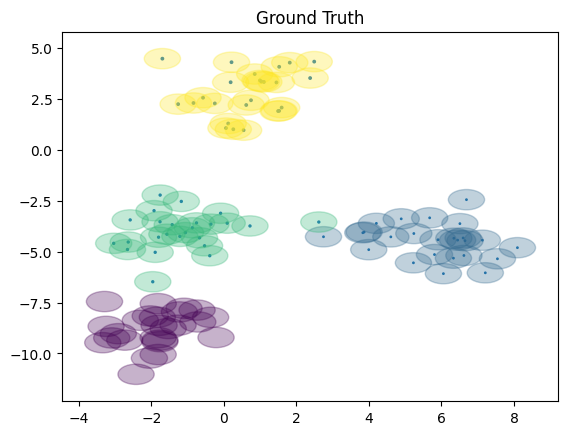

In [45]:
graphWithRadius(data[1], "Ground Truth")

### Calculate DBSCAN

In [26]:
#from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN as skDBSCAN # for comparison

# Experiment w/ NearestNeighbors
#def region_q_nn(X, P, eps):
#    o = NearestNeighbors(radius=eps).fit(X).radius_neighbors([P], return_distance=False)[0].tolist()
#    print(o)
#    return o

eps = 1.5
min_samples = 5

db_result = dbscan.dbscan(data[0], eps, min_samples)
db_sk = skDBSCAN(eps=eps, min_samples=min_samples).fit(data[0])

/tmp/ipykernel_24199/1327205475.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[0][:,0], data[0][:,1], c, cmap='coolwarm')


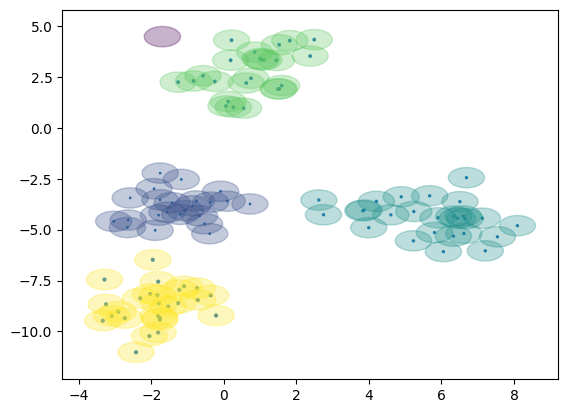

In [28]:
#graphWithRadius(db_sk.labels_)
graphWithRadius(db_result)

### Comparing our DBSCAN with sklearn DBSCAN

# of clusters of sklearn DBSCAN:  5
# of clusters of Our DBSCAN:  5


/tmp/ipykernel_24199/1327205475.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[0][:,0], data[0][:,1], c, cmap='coolwarm')


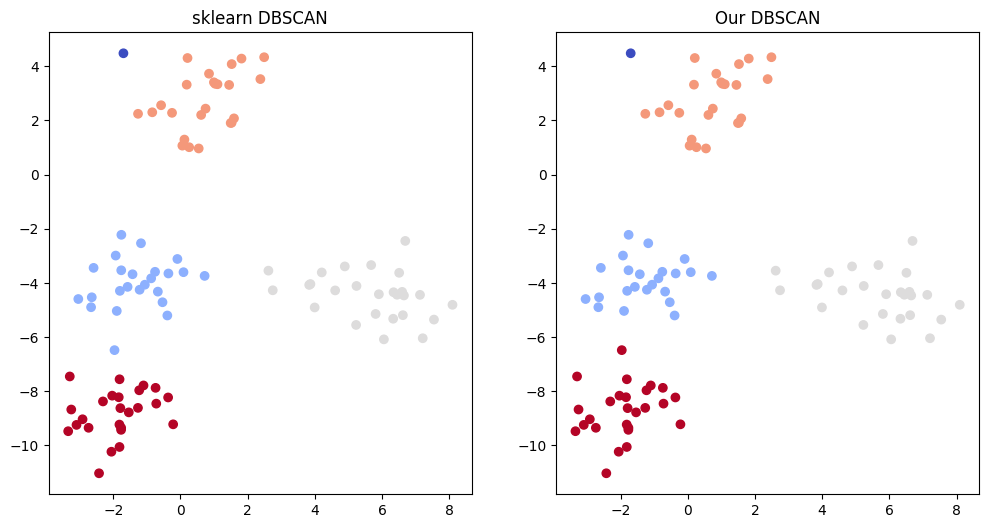

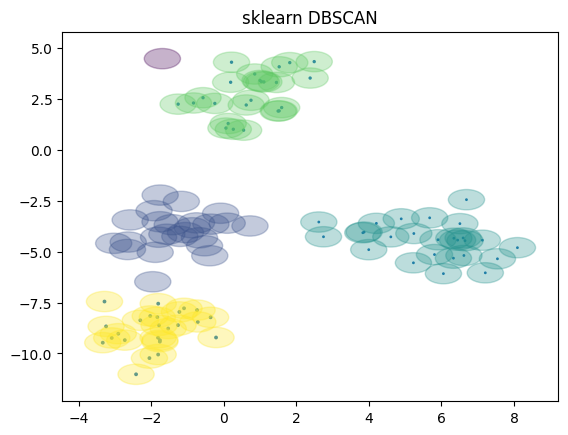

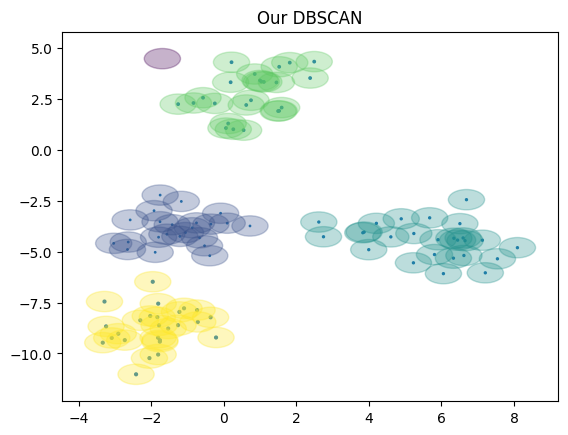

In [25]:
fig, ax  = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(data[0][:,0], data[0][:,1], c=db_sk.labels_, cmap='coolwarm')
ax[0].set_title('sklearn DBSCAN')
print("# of clusters of sklearn DBSCAN: ", len(np.unique(db_sk.labels_)))

ax[1].scatter(data[0][:,0], data[0][:,1], c=db_result, cmap='coolwarm')
ax[1].set_title('Our DBSCAN')
print("# of clusters of Our DBSCAN: ", len(np.unique(db_result)))


graphWithRadius(db_sk.labels_, "sklearn DBSCAN")
graphWithRadius(db_result, "Our DBSCAN")

In [18]:
db_result

array([1., 2., 3., 4., 0., 1., 1., 2., 2., 4., 2., 3., 1., 1., 2., 1., 2.,
       4., 1., 3., 1., 2., 2., 2., 1., 4., 1., 1., 3., 4., 4., 3., 3., 4.,
       1., 3., 3., 1., 1., 1., 3., 3., 1., 4., 4., 3., 2., 4., 3., 1., 4.,
       4., 1., 2., 3., 4., 3., 4., 2., 1., 4., 1., 1., 4., 2., 4., 4., 3.,
       2., 2., 2., 3., 3., 4., 3., 4., 2., 4., 3., 3., 4., 2., 4., 1., 4.,
       3., 2., 4., 2., 2., 2., 4., 2., 3., 1., 2., 2., 3., 3., 2.])

## Experiment 2

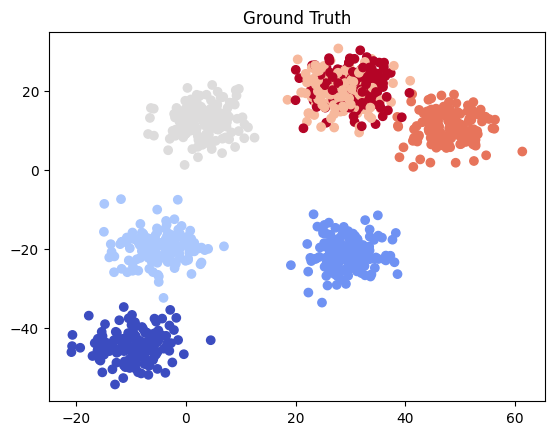

In [105]:
data = datasets.make_blobs(n_samples=1000, n_features=2, centers=7, cluster_std=4, random_state=40, center_box=(-50, 50))
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='coolwarm')
plt.title("Ground Truth")
plt.show()

In [118]:
eps = 4
min_samples = 5

db_result = dbscan.dbscan(data[0], eps=eps, min_pts=min_samples)
db_sk = skDBSCAN(eps=eps, min_samples=min_samples).fit(data[0])

/home/ranyk/.local/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/tmp/ipykernel_24199/1327205475.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data[0][:,0], data[0][:,1], c, cmap='coolwarm')


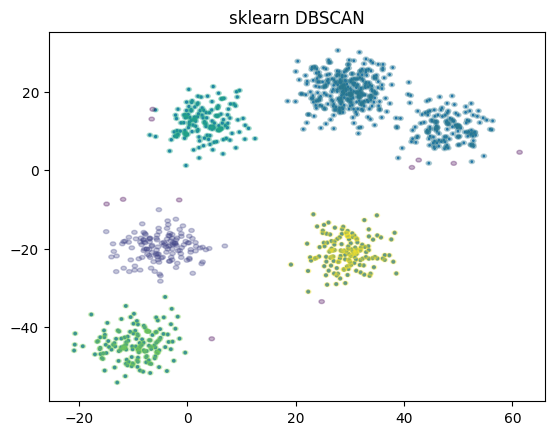

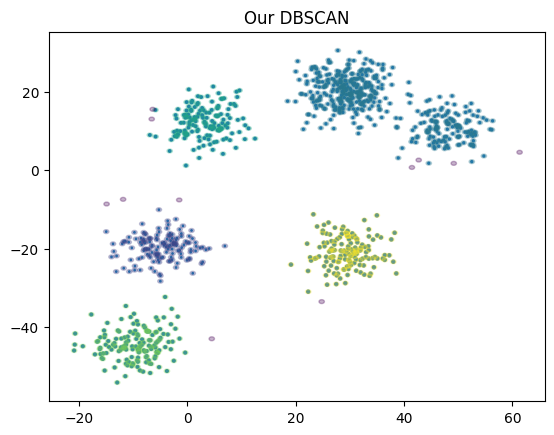

In [119]:
graphWithRadius(db_sk.labels_, "sklearn DBSCAN")
graphWithRadius(db_result, "Our DBSCAN")

In [120]:
# Num clusters of our DBSCAN
len(set(db_result))

6

In [121]:
# Num clusters of sklearn DBSCAN
len(set(db_sk.labels_))

6

In [124]:
from sklearn.metrics import adjusted_mutual_info_score
y_true = data[1]

# Accuracy of our DBSCAN
acc = adjusted_mutual_info_score(y_true, db_result)
print(f"AMI of our DBSCAN: {acc*100:.2f}%")


# Accuracy of sklearn DBSCAN
acc = adjusted_mutual_info_score(y_true, db_sk.labels_)
print(f"AMI of sklearn DBSCAN: {acc*100:.2f}%")

AMI of our DBSCAN: 84.01%
AMI of sklearn DBSCAN: 84.01%


### Grid Search for hyperparameter tuning

In [145]:
# For compatibility with sklearn (GridSearchCV)
class OurDBSCAN:
    def __init__(self, eps = 0.5, min_samples = 2):
        self.eps = eps
        self.min_samples = min_samples
    def fit(self, X):
        return dbscan.dbscan(X, self.eps, self.min_samples)
    def get_params(self, deep=True):
        return {'eps': self.eps, 'min_samples': self.min_samples}
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        print(self.eps, self.min_samples)
        return self

In [146]:
from sklearn.model_selection import GridSearchCV

eps_range = np.arange(0, 10, 0.5)
min_samples_range = np.arange(2, 10, 2)

param_grid = {'eps': eps_range, 'min_samples': min_samples_range}

grid = GridSearchCV(OurDBSCAN(), param_grid, cv=5, scoring='adjusted_mutual_info_score')
grid.fit(data[0])

0.0 2


/home/ranyk/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ranyk/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(


0.0 2
0.0 2
0.0 2
0.0 2
0.0 4
0.0 4
0.0 4
0.0 4
0.0 4
0.0 6
0.0 6
0.0 6
0.0 6
0.0 6
0.0 8
0.0 8
0.0 8
0.0 8
0.0 8
0.5 2
0.5 2
0.5 2
0.5 2
0.5 2
0.5 4
0.5 4
0.5 4
0.5 4
0.5 4
0.5 6
0.5 6
0.5 6
0.5 6
0.5 6
0.5 8
0.5 8
0.5 8
0.5 8
0.5 8
1.0 2
1.0 2
1.0 2
1.0 2
1.0 2
1.0 4
1.0 4
1.0 4
1.0 4
1.0 4
1.0 6
1.0 6
1.0 6
1.0 6
1.0 6
1.0 8
1.0 8
1.0 8
1.0 8
1.0 8
1.5 2
1.5 2
1.5 2
1.5 2
1.5 2
1.5 4
1.5 4
1.5 4
1.5 4
1.5 4
1.5 6
1.5 6
1.5 6
1.5 6
1.5 6
1.5 8
1.5 8
1.5 8
1.5 8
1.5 8
2.0 2
2.0 2
2.0 2
2.0 2
2.0 2
2.0 4
2.0 4
2.0 4
2.0 4
2.0 4
2.0 6
2.0 6
2.0 6
2.0 6
2.0 6
2.0 8
2.0 8
2.0 8
2.0 8
2.0 8
2.5 2
2.5 2
2.5 2
2.5 2
2.5 2
2.5 4
2.5 4
2.5 4
2.5 4
2.5 4
2.5 6
2.5 6
2.5 6
2.5 6
2.5 6
2.5 8
2.5 8
2.5 8
2.5 8
2.5 8
3.0 2
3.0 2
3.0 2
3.0 2
3.0 2
3.0 4
3.0 4
3.0 4
3.0 4
3.0 4
3.0 6
3.0 6
3.0 6
3.0 6
3.0 6
3.0 8
3.0 8
3.0 8
3.0 8
3.0 8
3.5 2
3.5 2
3.5 2
3.5 2
3.5 2
3.5 4
3.5 4
3.5 4
3.5 4
3.5 4
3.5 6
3.5 6
3.5 6
3.5 6
3.5 6
3.5 8
3.5 8
3.5 8
3.5 8
3.5 8
4.0 2
4.0 2
4.0 2
4.0 2
4.0 2
4.0 4
4.0 4
4.0 

/home/ranyk/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  warnings.warn(


0.0 2


GridSearchCV(cv=5, estimator=<__main__.OurDBSCAN object at 0x7fc70c390220>,
             param_grid={'eps': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]),
                         'min_samples': array([2, 4, 6, 8])},
             scoring='adjusted_mutual_info_score')

In [151]:
# get returns of dbscan during grid search
grid.cv_results_

{'mean_fit_time': array([1.34215145, 1.32558393, 1.34166198, 1.30552053, 1.31019473,
        1.32694235, 1.41208944, 1.39123659, 1.35760469, 1.44477372,
        1.48488288, 1.41281929, 1.34652734, 1.38495541, 1.44221668,
        1.41003447, 1.38588367, 1.36467028, 1.43966603, 1.45554762,
        1.38308949, 1.32414112, 1.33974209, 1.39558067, 1.36730628,
        1.60026941, 1.64042926, 1.36230397, 1.42466755, 1.42820563,
        1.40988202, 1.37434082, 1.32661004, 1.3458992 , 1.33368106,
        1.38235545, 1.3190989 , 1.3464097 , 1.3459722 , 1.34344869,
        1.32167211, 1.34904966, 1.32973151, 1.32367158, 1.33909597,
        1.32605119, 1.33436518, 1.33600388, 1.32149744, 1.35517049,
        1.41850743, 1.36656394, 1.32328496, 1.34717712, 1.33090062,
        1.33848834, 1.3357182 , 1.33429556, 1.35419812, 1.34062724,
        1.37511282, 1.50346136, 1.43426514, 1.39034839, 1.41681447,
        1.36469593, 1.35154471, 1.35371275, 1.34593005, 1.35927114,
        1.35259304, 1.33169904,